# Prdeicting Heart Failure Based on Clinical Data

This is in partial fulfillment of the course Statistical Modeling and simulation (CSMODEL). 

Submitted by: 
- ANG, Charlene
- CAI, Mark Jayson
- SANTOS, Carlo Luis
S15

Submitted to:

Mr. Thomas James Tiam-Lee 

September 22, 2020

## Heart Failure Prediction

https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

### Introduction

### Data Collection

## Exploratory Data Analysis

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re 
from functools import reduce

### Loading the Dataset 

In [2]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Dataset Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### Data Cleaning

#### Duplicates

In [5]:
df.duplicated().sum()

0

#### Null values

In [6]:
df.isna().sum().sort_values()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Based on the values presented above, there are no categorical data, no duplication of observations and no nullvalues present in the dataset, thus, the researchers will no longer perform data cleaning

### Exploratory Data Analysis Questions

**Question#1**: What are the average values of age that are most likely to contract heart failure?

First lets look at the age distribution of the patients

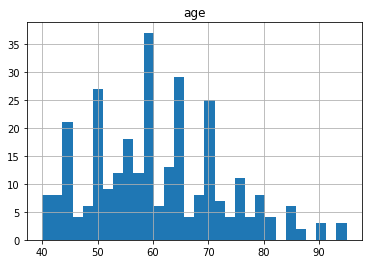

In [62]:
df.hist("age", bins=30)
plt.show()

Let's now look at the average, median, and standard deviation age of the patients.

In [15]:
df.agg({"age": ["mean", "median", "std", "count"]})

,age
mean,60.833893
median,60.000000
std,11.894809
count,299.000000


**Answer#1**: 60.83 is the average age in which patients contract a heart disease. 60 is the median age. And the standard deviation is 11.89.

**Question#2**: Is Age and Sex an indicator for Death Event?

Let's first look at the death event and the age of the patients.

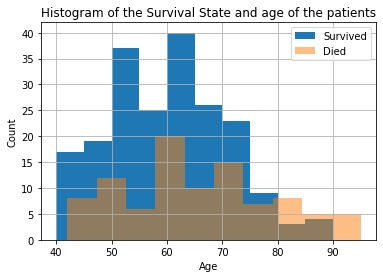

In [60]:
x = df.loc[df['DEATH_EVENT'] == 0, ['age']]
y = df.loc[df['DEATH_EVENT'] == 1, ['age']]

fig, ax = plt.subplots()
x.hist(alpha=1, ax=ax, label="Survived")
y.hist(alpha=0.5, ax=ax, label="Died")
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of the Survival State and age of the patients')
plt.legend(loc='upper right')
plt.show()

Let's now look at the death event and the sex of the patient.

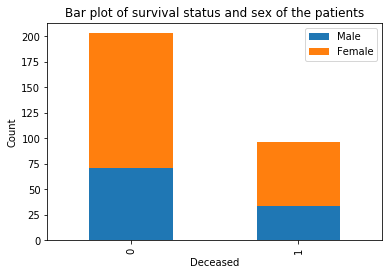

In [59]:
df.groupby(['DEATH_EVENT', 'sex']).size().unstack().plot(kind='bar', stacked='True')
plt.xlabel('Deceased')
plt.ylabel('Count')
plt.title('Bar plot of survival status and sex of the patients')
plt.legend(["Male", "Female"])
plt.show()

**Answer#2**:

**Question#3**:What is the distribution of patients in the following clinical features of the dataset?

Here we are going to look at the percentage of patients who have anemia, diabetes, and those who smoke.

#### Anaemia Percentage

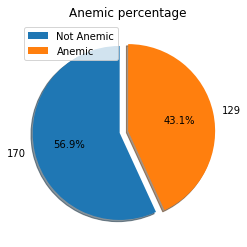

In [76]:
val = df['anaemia'].value_counts()
labels = ['Not Anemic', 'Anemic']
explode = (0.1, 0)
slices = plt.pie(val, labels = val, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Anemic percentage')
plt.legend(labels)
plt.show()

#### Diabetic Percentage

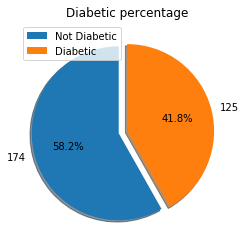

In [74]:
val = df['diabetes'].value_counts()
labels = ['Not Diabetic', 'Diabetic']
explode = (0.1, 0)
slices = plt.pie(val, labels = val, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Diabetic percentage')
plt.legend(labels)
plt.show()

#### Smoking percentage

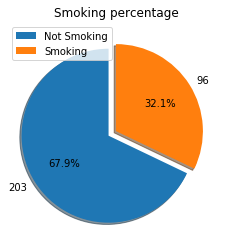

In [77]:
val = df['smoking'].value_counts()
labels = ['Not Smoking', 'Smoking']
explode = (0.1, 0)
slices = plt.pie(val, labels = val, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Smoking percentage')
plt.legend(labels)
plt.show()

**Answer#3**:

**Question#4**: What is the correlation of each variable to the death event?
- Age
- Anaemia
- Creatinine Phosphokinase
- Diabetes
- Ejection fraction
- Hypertension
- Level of serum creatinine
- Level of serum sodium
- Platelets in the blood
- Smoking
- Sex


**Answer#4**:

## Research Questions

**Research Question #1** :Given the level of age, time, serum sodium, serum creatinine, and ejection fraction, what is the chance of heart failure?


**Research Question #2** : Find the confidence interval of the level of serum creatinine and ejection fraction for those who have heart failure death event between high blood and non high-blood?

## Insights and Conclusion